<h1>Анализ клиентских данных магазина</h1>

<h2>Первый проект на Jupiter Notebook</h2>

### Задачи в рамках проекта
* Для анализа дан магазин с 200 покупателями. Данные получены из банка открытых датасетов [Kaggle](https://www.kaggle.com/datasets)
* Существует выгрузка в виде CSV, которую нужно распарсить с помощью Python и статистически проанализировать.
* Посчитать средний возраст и доход клиентов магазина.
* Построить точечный график распределения дохода в зависимости от покупательского балла.
* Построить столбчатую диаграмму среднего дохода покупателей по возрастам.

В первую очередь, понимаем, какие библиотеки нам понадобятся в работе. Это Pandas для загрузки и обработки датасета и Matplotlib для отрисовки графиков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Статистические расчеты

Выгрузим таблицу с помощью библиотеки **Pandas.**

Выведем содержимое таблицы с клиентскими данными в интерфейс *Jupiter Notebook.*

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head(5)

CustomerID   Genre  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

Считаем колонку **CustomerID** как индекс первого столбца и установим его ключом. Убедимся, что первая колонка-индекс пропала

In [4]:
data.set_index('CustomerID', inplace=True) 
data.head(5)

Genre  Age  Annual_Income  Spending_Score
CustomerID                                            
1             Male   19             15              39
2             Male   21             15              81
3           Female   20             16               6
4           Female   23             16              77
5           Female   31             17              40

Считаем статистики по датасету: *средние, отклонения, экстремумы, процентили.*

Воспользуемся стандартыми возможностями функции Python **desсribe()**

Для расчета средней была использована следующая формула:

\begin{equation*}
\frac{\sum x_i}{n}
\end{equation*}

Для расчета отклонения была использована формула дисперсии:

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/7273a8.png'>

In [5]:
data.describe()

Age  Annual_Income  Spending_Score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000

**Вывод:** средний возраст покупателей - *38.85 лет*, средний годовой доход покупателей - *60 560 $ в год*

Сделаем рассчет суммы и количества повторений годового дохода по возрастным группам.

Соберем новую таблицу с тремя колонками: возраст (age), суммарный годовой доход (sum), число лиц в возрастной группе (count), средний годовой доход (mean)

In [6]:
df = data.groupby(['Age'])['Annual_Income'].agg(['mean'])
df.head(5)

mean
Age           
18   51.250000
19   57.000000
20   41.600000
21   38.800000
22   31.333333

## Визуализация результатов

Рисуем график распределения возраста по бонусной шкале

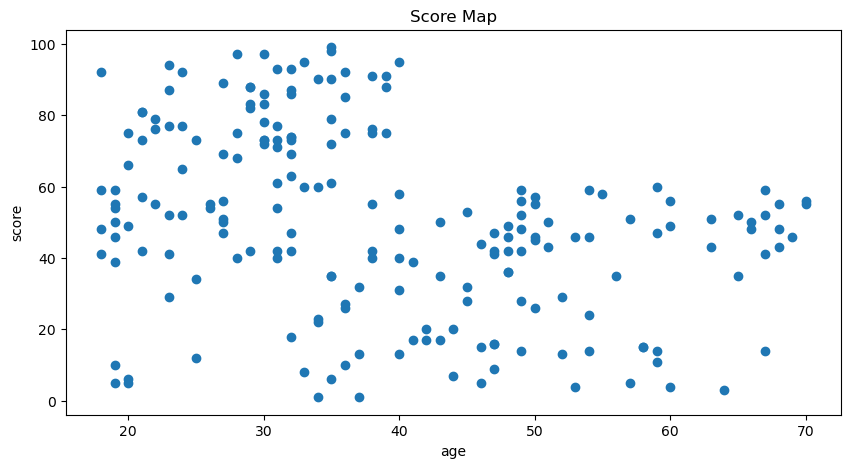

In [7]:
plt.figure(figsize = (10,5))
x = data.Age
y = data.Spending_Score
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("score")
plt.title("Score Map")
plt.show()

**Вывод:** чем старше по возрасту покупатель, тем ниже его покупательский балл. Это объясняет большую лояльность молодого поколения к различным промоакциям и стремление участвовать в программах скидок, кэшбэков, накопления бонусных валют для последующих покупок.

Теперь нарисуем столбчатую диаграмму.

Назовем ее *Income Bar Chart*, добавим легенду, назовем горизонтальную ось *AGE*, вертикальную ось - *Average Annual Income*

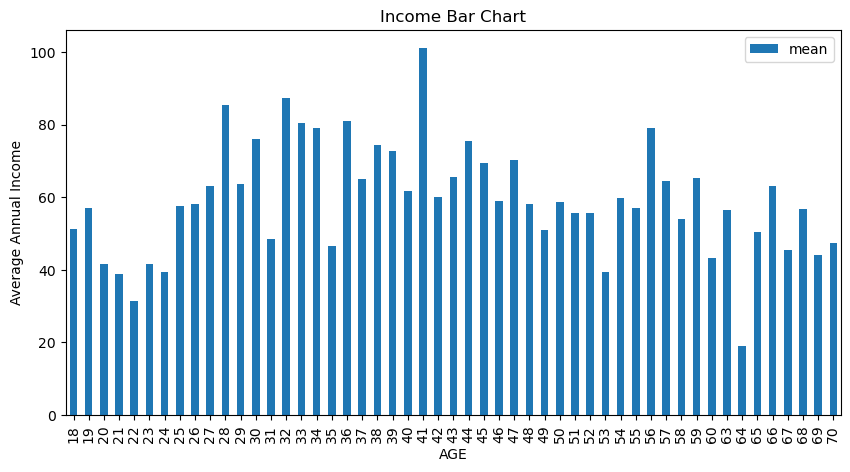

In [8]:
data.groupby(['Age'])['Annual_Income'].agg(['mean']).plot(kind='bar', figsize=(10,5))
plt.xlabel("AGE")
plt.ylabel("Average Annual Income")
plt.title("Income Bar Chart")
plt.show()

**Вывод**: покупатели среднего возраста имеют доход выше, чем более молодые или пристарелые покупатели.

### Конец первого проекта с использованием Jupiter Notebook
### Поздравляю!